# Импортируем базовые библиотеки, подгружаем датасет

In [73]:
import pandas as pd
import numpy as np
import seaborn as sb
import sklearn.preprocessing as prep
df = pd.read_csv("./data.csv")
#print(df)

## Фильтруем нужные поля, смотрим типы

In [74]:
fields = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'MultipleLines',
    'PhoneService',
    'InternetService',
    'OnlineSecurity',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges',
    'Churn' 
    ]
df = df.loc[:, fields]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   MultipleLines     7043 non-null   object 
 5   PhoneService      7043 non-null   object 
 6   InternetService   7043 non-null   object 
 7   OnlineSecurity    7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  PaperlessBilling  7043 non-null   object 
 14  PaymentMethod     7043 non-null   object 
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   object 


# Смотрим возможные значения категориальных полей

In [75]:
print("SeniorCitizen values: ", df["SeniorCitizen"].unique())
print("Partner values: ", df["Partner"].unique())

print("gender values: ", df["gender"].unique())
print("Dependents values: ", df["Dependents"].unique())

print("MultipleLines values: ", df["MultipleLines"].unique())
print("PhoneService values: ", df["PhoneService"].unique())

print("InternetService values: ", df["InternetService"].unique())

print("OnlineSecurity values: ", df["OnlineSecurity"].unique())
print("DeviceProtection values: ", df["DeviceProtection"].unique())

print("TechSupport values: ", df["TechSupport"].unique())
print("StreamingTV values: ", df["StreamingTV"].unique())

print("StreamingMovies values: ", df["StreamingMovies"].unique())
print("Contract values: ", df["Contract"].unique())

print("PaperlessBilling values: ", df["PaperlessBilling"].unique())
print("PaymentMethod values: ", df["PaymentMethod"].unique())

print("Churn values: ", df["Churn"].unique())

SeniorCitizen values:  [0 1]
Partner values:  ['Yes' 'No']
gender values:  ['Female' 'Male']
Dependents values:  ['No' 'Yes']
MultipleLines values:  ['No phone service' 'No' 'Yes']
PhoneService values:  ['No' 'Yes']
InternetService values:  ['DSL' 'Fiber optic' 'No']
OnlineSecurity values:  ['No' 'Yes' 'No internet service']
DeviceProtection values:  ['No' 'Yes' 'No internet service']
TechSupport values:  ['No' 'Yes' 'No internet service']
StreamingTV values:  ['No' 'Yes' 'No internet service']
StreamingMovies values:  ['No' 'Yes' 'No internet service']
Contract values:  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling values:  ['Yes' 'No']
PaymentMethod values:  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn values:  ['No' 'Yes']


# Кодируем категориальные переменные

In [76]:
from sklearn.preprocessing import LabelEncoder

yes_no_fields = [
    'gender',
    'Partner',
    'Dependents',
    'PaperlessBilling',
    'PhoneService',
    'Churn'
]

for index in df.index:
    v = df.at[index, 'TotalCharges']
    try:
        v = float(v)
    except:
        v = -1

    df.at[index, 'TotalCharges'] = v    
    
        
    for f in yes_no_fields:            
        if (df.loc[index, f] == "No"):
            df.at[index, f] = 0
        else:
            df.at[index, f] = 1    
    
df[yes_no_fields] = df[yes_no_fields].apply(pd.to_numeric)            
df[['TotalCharges']] = df[['TotalCharges']].apply(pd.to_numeric)             
        
multiple_lines_enc = LabelEncoder()
df['MultipleLines'] = multiple_lines_enc.fit_transform(df['MultipleLines'])
            
internet_service_enc = LabelEncoder()
df['InternetService'] = internet_service_enc.fit_transform(df['InternetService'])

device_protection_enc = LabelEncoder()
df['DeviceProtection'] = device_protection_enc.fit_transform(df['DeviceProtection'])

online_security_enc = LabelEncoder()
df['OnlineSecurity'] = online_security_enc.fit_transform(df['OnlineSecurity'])

tech_support_enc = LabelEncoder()
df['TechSupport'] = tech_support_enc.fit_transform(df['TechSupport'])

streaming_tv_enc = LabelEncoder()
df['StreamingTV'] = streaming_tv_enc.fit_transform(df['StreamingTV'])

streaming_movies_enc = LabelEncoder()
df['StreamingMovies'] = streaming_movies_enc.fit_transform(df['StreamingMovies'])

contract_enc = LabelEncoder()
df['Contract'] = contract_enc.fit_transform(df['Contract'])

payment_method_enc = LabelEncoder()
df['PaymentMethod'] = payment_method_enc.fit_transform(df['PaymentMethod'])

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   MultipleLines     7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   InternetService   7043 non-null   int64  
 7   OnlineSecurity    7043 non-null   int64  
 8   DeviceProtection  7043 non-null   int64  
 9   TechSupport       7043 non-null   int64  
 10  StreamingTV       7043 non-null   int64  
 11  StreamingMovies   7043 non-null   int64  
 12  Contract          7043 non-null   int64  
 13  PaperlessBilling  7043 non-null   int64  
 14  PaymentMethod     7043 non-null   int64  
 15  MonthlyCharges    7043 non-null   float64
 16  TotalCharges      7043 non-null   float64


# EDA

In [77]:
valuesToPlot = [[], []]
eda_df = df.loc[df['TotalCharges'] != -1].loc[:, ['MonthlyCharges', 'TotalCharges']]
#print(eda_df)

indicators = ['MonthlyCharges', 'TotalCharges']
i = 0
for indicator in indicators:
    #print(indicator)
    values = eda_df.loc[:, indicator].astype('float32')
    print(values)
    valuesToPlot[i] = values
    i = i + 1
    mean = values.mean()
    std = values.std()
    median = values.median()
    perecntile_25 = np.percentile(values, 25)
    perecntile_75 = np.percentile(values, 75)

    #print("Мат. ожидание: ", mean)
    #print("Дисперсия: ", std)
    #print("Медиана: ", median)
    #print("25-ый персцентиль: ", perecntile_25)
    #print("75-ый персцентиль: ", perecntile_75)
    print("\n\n")


0        29.850000
1        56.950001
2        53.849998
3        42.299999
4        70.699997
           ...    
7038     84.800003
7039    103.199997
7040     29.600000
7041     74.400002
7042    105.650002
Name: MonthlyCharges, Length: 7032, dtype: float32



0         29.850000
1       1889.500000
2        108.150002
3       1840.750000
4        151.649994
           ...     
7038    1990.500000
7039    7362.899902
7040     346.450012
7041     306.600006
7042    6844.500000
Name: TotalCharges, Length: 7032, dtype: float32





<Axes: xlabel='MonthlyCharges', ylabel='Count'>

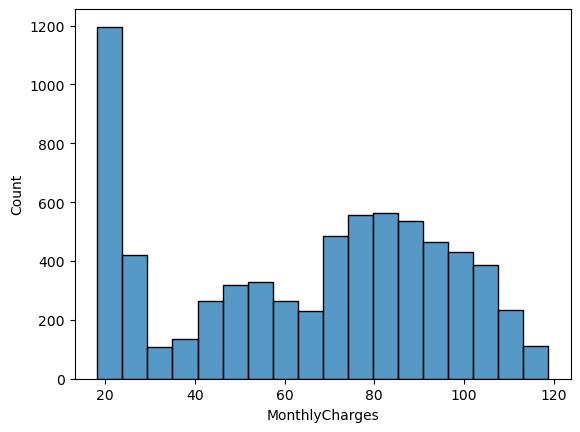

In [78]:
sb.histplot(valuesToPlot[0])

<Axes: xlabel='TotalCharges', ylabel='Count'>

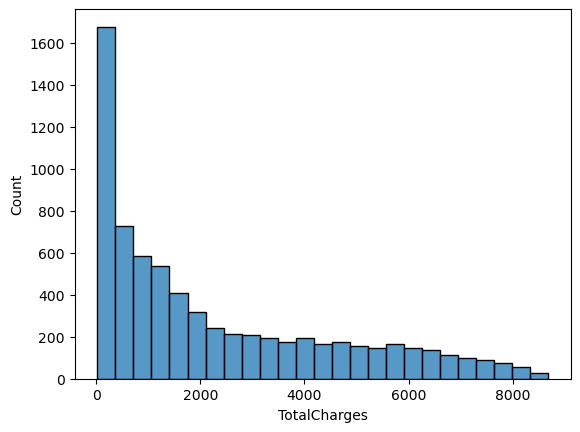

In [79]:
sb.histplot(valuesToPlot[1])

<Axes: >

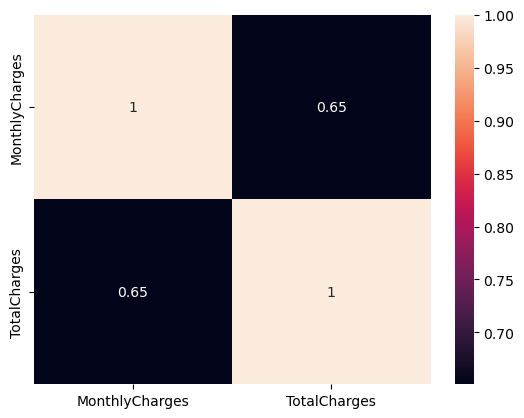

In [80]:
R1 = np.corrcoef(valuesToPlot)
axis_labels = indicators = ['MonthlyCharges', 'TotalCharges']
sb.heatmap(R1, xticklabels = axis_labels, yticklabels = axis_labels, annot=True)

# Train-test

In [81]:
from sklearn.model_selection import train_test_split

X_fields = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'MultipleLines',
    'PhoneService',
    'InternetService',
    'OnlineSecurity',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'MonthlyCharges',
    'TotalCharges'
]

Y_fields = ['Churn']

X = df[X_fields]
Y = df[Y_fields]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0)

# Boosting

In [82]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
Y_preds_gb = xgb_clf.predict(X_test)
Y_scores_gb = xgb_clf.predict_proba(X_test)
print('ok')   


ok


In [83]:

from catboost import CatBoostClassifier
ctb_clf = CatBoostClassifier()
ctb_clf.fit(X_train, y_train)
Y_preds_ctb = ctb_clf.predict(X_test)
Y_scores_ctb = ctb_clf.predict_proba(X_test)
print('ok')   

Learning rate set to 0.02036
0:	learn: 0.6792577	total: 3.19ms	remaining: 3.19s
1:	learn: 0.6654497	total: 4.57ms	remaining: 2.28s
2:	learn: 0.6518373	total: 6.38ms	remaining: 2.12s
3:	learn: 0.6396200	total: 8.15ms	remaining: 2.03s
4:	learn: 0.6279249	total: 9.88ms	remaining: 1.97s
5:	learn: 0.6163109	total: 11.6ms	remaining: 1.91s
6:	learn: 0.6061165	total: 13.3ms	remaining: 1.88s
7:	learn: 0.5967772	total: 15.3ms	remaining: 1.9s
8:	learn: 0.5879010	total: 17.1ms	remaining: 1.88s
9:	learn: 0.5790225	total: 19ms	remaining: 1.88s
10:	learn: 0.5712724	total: 20.4ms	remaining: 1.83s
11:	learn: 0.5633622	total: 22.1ms	remaining: 1.82s
12:	learn: 0.5561571	total: 23.9ms	remaining: 1.82s
13:	learn: 0.5489698	total: 25.8ms	remaining: 1.82s
14:	learn: 0.5429095	total: 27.2ms	remaining: 1.78s
15:	learn: 0.5364393	total: 29ms	remaining: 1.78s
16:	learn: 0.5313493	total: 31ms	remaining: 1.79s
17:	learn: 0.5258707	total: 32.5ms	remaining: 1.77s
18:	learn: 0.5208450	total: 34ms	remaining: 1.75s
19

218:	learn: 0.3779842	total: 394ms	remaining: 1.41s
219:	learn: 0.3779713	total: 396ms	remaining: 1.4s
220:	learn: 0.3779600	total: 398ms	remaining: 1.4s
221:	learn: 0.3778773	total: 399ms	remaining: 1.4s
222:	learn: 0.3776213	total: 402ms	remaining: 1.4s
223:	learn: 0.3774141	total: 407ms	remaining: 1.41s
224:	learn: 0.3773945	total: 408ms	remaining: 1.4s
225:	learn: 0.3771934	total: 410ms	remaining: 1.4s
226:	learn: 0.3771046	total: 411ms	remaining: 1.4s
227:	learn: 0.3769331	total: 413ms	remaining: 1.4s
228:	learn: 0.3767799	total: 414ms	remaining: 1.4s
229:	learn: 0.3766676	total: 416ms	remaining: 1.39s
230:	learn: 0.3765455	total: 418ms	remaining: 1.39s
231:	learn: 0.3765423	total: 419ms	remaining: 1.39s
232:	learn: 0.3764105	total: 421ms	remaining: 1.39s
233:	learn: 0.3762446	total: 423ms	remaining: 1.38s
234:	learn: 0.3760416	total: 424ms	remaining: 1.38s
235:	learn: 0.3758468	total: 426ms	remaining: 1.38s
236:	learn: 0.3756481	total: 428ms	remaining: 1.38s
237:	learn: 0.3754781

417:	learn: 0.3538173	total: 791ms	remaining: 1.1s
418:	learn: 0.3536834	total: 792ms	remaining: 1.1s
419:	learn: 0.3534881	total: 794ms	remaining: 1.1s
420:	learn: 0.3533292	total: 796ms	remaining: 1.09s
421:	learn: 0.3531762	total: 798ms	remaining: 1.09s
422:	learn: 0.3530177	total: 804ms	remaining: 1.1s
423:	learn: 0.3529872	total: 806ms	remaining: 1.09s
424:	learn: 0.3529224	total: 808ms	remaining: 1.09s
425:	learn: 0.3528189	total: 809ms	remaining: 1.09s
426:	learn: 0.3527566	total: 811ms	remaining: 1.09s
427:	learn: 0.3526679	total: 814ms	remaining: 1.09s
428:	learn: 0.3525547	total: 815ms	remaining: 1.08s
429:	learn: 0.3523788	total: 818ms	remaining: 1.08s
430:	learn: 0.3522994	total: 820ms	remaining: 1.08s
431:	learn: 0.3522636	total: 822ms	remaining: 1.08s
432:	learn: 0.3520943	total: 823ms	remaining: 1.08s
433:	learn: 0.3520313	total: 825ms	remaining: 1.08s
434:	learn: 0.3518829	total: 827ms	remaining: 1.07s
435:	learn: 0.3517988	total: 829ms	remaining: 1.07s
436:	learn: 0.35

616:	learn: 0.3327015	total: 1.19s	remaining: 736ms
617:	learn: 0.3326279	total: 1.19s	remaining: 735ms
618:	learn: 0.3325088	total: 1.19s	remaining: 733ms
619:	learn: 0.3324655	total: 1.19s	remaining: 731ms
620:	learn: 0.3323658	total: 1.19s	remaining: 729ms
621:	learn: 0.3323119	total: 1.2s	remaining: 728ms
622:	learn: 0.3322172	total: 1.2s	remaining: 726ms
623:	learn: 0.3321493	total: 1.2s	remaining: 725ms
624:	learn: 0.3320306	total: 1.21s	remaining: 723ms
625:	learn: 0.3318984	total: 1.21s	remaining: 722ms
626:	learn: 0.3317931	total: 1.21s	remaining: 720ms
627:	learn: 0.3317253	total: 1.21s	remaining: 718ms
628:	learn: 0.3316266	total: 1.21s	remaining: 716ms
629:	learn: 0.3315239	total: 1.22s	remaining: 714ms
630:	learn: 0.3314842	total: 1.22s	remaining: 712ms
631:	learn: 0.3313659	total: 1.22s	remaining: 710ms
632:	learn: 0.3312757	total: 1.22s	remaining: 708ms
633:	learn: 0.3311183	total: 1.22s	remaining: 706ms
634:	learn: 0.3310769	total: 1.22s	remaining: 704ms
635:	learn: 0.3

790:	learn: 0.3181103	total: 1.59s	remaining: 419ms
791:	learn: 0.3180089	total: 1.59s	remaining: 417ms
792:	learn: 0.3179827	total: 1.59s	remaining: 415ms
793:	learn: 0.3178802	total: 1.59s	remaining: 413ms
794:	learn: 0.3177785	total: 1.59s	remaining: 411ms
795:	learn: 0.3176879	total: 1.59s	remaining: 409ms
796:	learn: 0.3176376	total: 1.59s	remaining: 406ms
797:	learn: 0.3174956	total: 1.6s	remaining: 404ms
798:	learn: 0.3174508	total: 1.61s	remaining: 405ms
799:	learn: 0.3174241	total: 1.61s	remaining: 402ms
800:	learn: 0.3173543	total: 1.61s	remaining: 400ms
801:	learn: 0.3172209	total: 1.61s	remaining: 398ms
802:	learn: 0.3171963	total: 1.61s	remaining: 396ms
803:	learn: 0.3170677	total: 1.61s	remaining: 394ms
804:	learn: 0.3169701	total: 1.61s	remaining: 391ms
805:	learn: 0.3168813	total: 1.62s	remaining: 389ms
806:	learn: 0.3168081	total: 1.63s	remaining: 389ms
807:	learn: 0.3167840	total: 1.63s	remaining: 387ms
808:	learn: 0.3167449	total: 1.63s	remaining: 385ms
809:	learn: 0

991:	learn: 0.3027024	total: 1.98s	remaining: 16ms
992:	learn: 0.3026762	total: 1.99s	remaining: 14ms
993:	learn: 0.3025557	total: 1.99s	remaining: 12ms
994:	learn: 0.3024875	total: 1.99s	remaining: 10ms
995:	learn: 0.3024501	total: 1.99s	remaining: 8ms
996:	learn: 0.3023257	total: 1.99s	remaining: 6ms
997:	learn: 0.3023082	total: 2s	remaining: 4ms
998:	learn: 0.3022568	total: 2s	remaining: 2ms
999:	learn: 0.3022060	total: 2s	remaining: 0us
ok


In [96]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier()
lgb_clf.fit(X_train, y_train.values.ravel())
Y_preds_lgb = lgb_clf.predict(X_test)
Y_scores_lgb = lgb_clf.predict_proba(X_test)


[LightGBM] [Info] Number of positive: 1316, number of negative: 3614
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000724 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 548
[LightGBM] [Info] Number of data points in the train set: 4930, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.266937 -> initscore=-1.010218
[LightGBM] [Info] Start training from score -1.010218


# Метрики

In [97]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix, roc_curve, auc


# XGBoost

XGBoost: 
accuracy:  0.7823000473260767
recall:  0.7049015857560161
f1_score:  0.7103719948986282
precision:  0.7170908648780092
ROCAUC:  0.8186703064867622


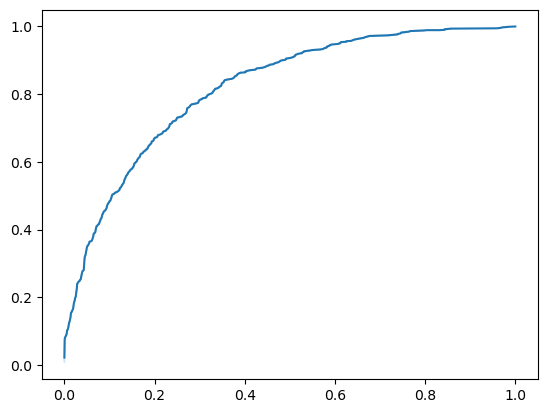

In [98]:
print("XGBoost: ")

accuracy_gb = accuracy_score(y_test, Y_preds_gb)
print("accuracy: ", accuracy_gb)

recall_gb = recall_score(y_test, Y_preds_gb, average='macro')
print("recall: ", recall_gb)

f1_score_gb = f1_score(y_test, Y_preds_gb, average='macro')
print("f1_score: ", f1_score_gb)

precision_gb = precision_score(y_test, Y_preds_gb, average='macro')
print("precision: ", precision_gb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_gb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)


# CatBoost

CatBoost: 
accuracy:  0.8007572172266919
recall:  0.7156506468215329
f1_score:  0.7270549358501335
precision:  0.7438998009864152
ROCAUC:  0.8337494783697316


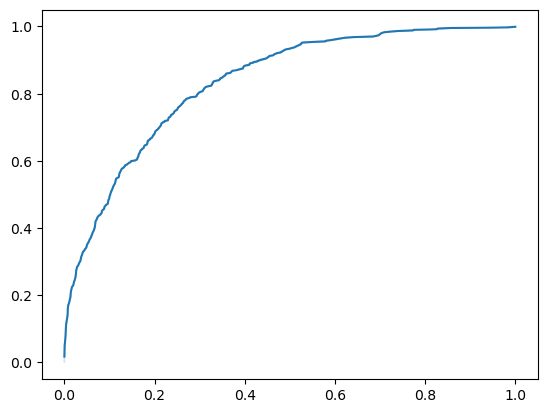

In [99]:
print("CatBoost: ")

accuracy_ctb = accuracy_score(y_test, Y_preds_ctb)
print("accuracy: ", accuracy_ctb)

recall_ctb = recall_score(y_test, Y_preds_ctb, average='macro')
print("recall: ", recall_ctb)

f1_score_ctb = f1_score(y_test, Y_preds_ctb, average='macro')
print("f1_score: ", f1_score_ctb)

precision_ctb = precision_score(y_test, Y_preds_ctb, average='macro')
print("precision: ", precision_ctb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_ctb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

# Lightgbm

Lightgbm: 
accuracy:  0.795551348793185
recall:  0.7156506468215329
f1_score:  0.7245110821382008
precision:  0.7355467240504028
ROCAUC:  0.8300621319608661


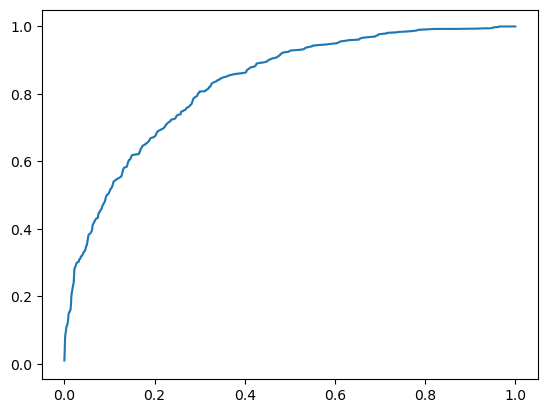

In [101]:
print("Lightgbm: ")

accuracy_lgb = accuracy_score(y_test, Y_preds_lgb)
print("accuracy: ", accuracy_lgb)

recall_lgb = recall_score(y_test, Y_preds_lgb, average='macro')
print("recall: ", recall_ctb)

f1_score_lgb = f1_score(y_test, Y_preds_lgb, average='macro')
print("f1_score: ", f1_score_lgb)

precision_lgb = precision_score(y_test, Y_preds_lgb, average='macro')
print("precision: ", precision_lgb)

fpr, tpr, threshold = roc_curve(y_test, Y_scores_lgb[:, 1])
roc_auc = auc(fpr, tpr)
sb.lineplot(x = fpr, y = tpr)

print("ROCAUC: ", roc_auc)

Room type:  Entire home/apt


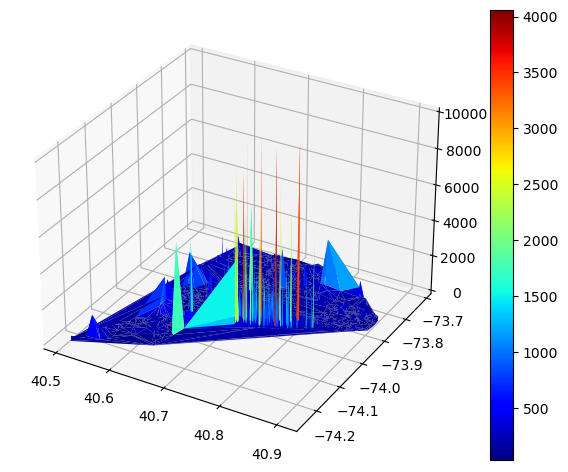

In [11]:
draw_surf(price_by_coordinates, room_types[1])

Room type:  Shared room


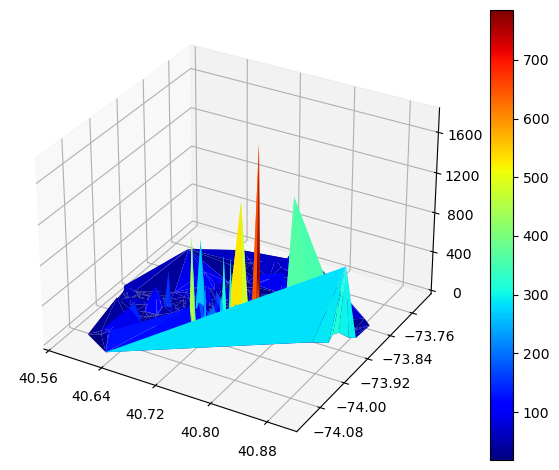

In [12]:
draw_surf(price_by_coordinates, room_types[2])

In [13]:
# Исходя из визуализации зависимости цены от координат, предполагаем, что есть некий центр, где квартиры дороже
# Находим данный максимум со всего датасета, и измеряем расстояния до него от всех локаций в датаесете

max_price_rec = df.loc[df['price'].idxmax(), ['latitude', 'longitude']]

In [14]:
# Функция для кодирования координат
# Вычисляется как 1 / (eps + dist(max_price_location, current_location))
# Где dist(max_price_location, current_location) - это расстояние от текущей локации до локации с наибольшей ценой
# eps - дополнительный параметр, чтобы избежать деления на 0, если текущая локация является локацией с наибольшей ценой
def transform_coordinates(lat, lon):
    latitude = max_price_rec['latitude']
    longitude = max_price_rec['longitude']
    eps = 0.000001
    point1 = np.array((lat, lon))
    point2 = np.array((latitude, longitude))
    dist = np.linalg.norm(point1 - point2)
    return 1 / (eps + dist)

#Тест 
#print(transform_coordinates(40.7681, -73.91651))
    

In [15]:
# Условный скоринг для параметра типа жилья Shared - 2, Private - 3, All apt - 5 (числа Фибоначчи)
# print(room_types)
def transform_room_type(room_type):
    if (room_type == 'Shared room'):
        return 2
    if (room_type == 'Private room'):
        return 3
    return 5

# Тест
# print(transform_room_type('Private room'))
# print(transform_room_type('Entire home/apt'))
# print(transform_room_type('Shared room'))

In [16]:
# Создаем мапы для трансормации названия района в среднюю цену по району

price_by_neighbourhood_group = df.loc[:, ['price', 'neighbourhood_group']].groupby(['neighbourhood_group']).mean().reset_index()
price_by_neighbourhood = df.loc[:, ['price', 'neighbourhood']].groupby(['neighbourhood']).mean().reset_index()
price_by_neighbourhood = price_by_neighbourhood.set_index('neighbourhood').to_dict()['price']
price_by_neighbourhood_group = price_by_neighbourhood_group.set_index('neighbourhood_group').to_dict()['price']

# Тест
# print(price_by_neighbourhood_group)
# print(price_by_neighbourhood)

def transform_neighbourhood_group(neighbourhood_group):
    return price_by_neighbourhood_group[neighbourhood_group]
#Тест
#print(transform_neighbourhood_group('Brooklyn'))

def transform_neighbourhood(neighbourhood):
    return price_by_neighbourhood[neighbourhood]
#Тест
#print(transform_neighbourhood('Allerton'))


In [17]:
# трансформруем (кодируем) данные
import math
import time
import datetime

#df = pd.read_csv("./data.csv")
for i in df.index:
    df.at[i, 'room_type'] = transform_room_type(df.at[i, 'room_type'])
    df.at[i, 'neighbourhood_group'] = transform_neighbourhood_group(df.at[i, 'neighbourhood_group'])
    df.at[i, 'neighbourhood'] = transform_neighbourhood(df.at[i, 'neighbourhood'])
    df.at[i, 'dist_to_center'] = transform_coordinates(df.at[i, 'latitude'], df.at[i, 'longitude'])
    
    if (df.at[i, 'reviews_per_month'] != df.at[i, 'reviews_per_month']):
        df.at[i, 'reviews_per_month'] = 0
    last_review = df.at[i, 'last_review']
    
    #даты последнего ревью заменяем на timestamp
    if (last_review != last_review):
        last_review = 0
    else:
        last_review = time.mktime(datetime.datetime.strptime(last_review, "%Y-%m-%d").timetuple())
    df.at[i, 'last_review'] = last_review
    
    # т.к минимальное количество ночей (грубо говоря) обратно пропорционально привлекательности жилья,
    # возоводим в -1 степень для применения в модели
    df.at[i, 'minimum_nights'] = 1 / df.at[i, 'minimum_nights']


In [18]:
fields = [
    'neighbourhood_group',
    'neighbourhood',
    'dist_to_center',
    'room_type',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'last_review',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365'
]
df = df.loc[:, fields]

<Axes: >

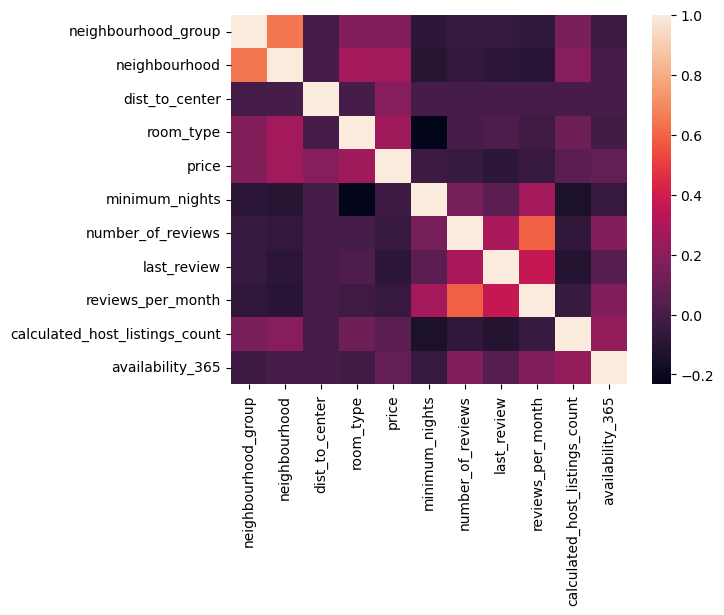

In [19]:
heat_map_vals = [[], [], [], [], [], [], [], [], [], [], []]

i = 0
for field in fields:
    values = df.loc[:, field].values.tolist()  
    heat_map_vals[i] = values
    i = i + 1

R1 = np.corrcoef(heat_map_vals)

axis_labels = fields
sb.heatmap(R1, xticklabels = axis_labels, yticklabels = axis_labels, annot=False)

In [20]:
# Как видно, из heat map, корреляция между признаками не превышает 0.6. Учитывая это, а также что признаков итак немного,
# Для построения модели воспользуеся всеми признаками

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()


# Применяем StandardScaler к данным, с максимальной долей случайности (количестов ревью, последний просмотре и т. п.)
# К остальным MinMaxScaler


train_test_data = df.loc[:, ['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] 
train, test = train_test_split(train_test_data, test_size = 0.3, shuffle = True)

train[['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'dist_to_center', 'room_type', 'price', 'minimum_nights']] = min_max_scaler.fit_transform(train[['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'dist_to_center', 'room_type', 'price', 'minimum_nights']])
train[['number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] = standard_scaler.fit_transform(train[['number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

test[['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'dist_to_center', 'room_type', 'price', 'minimum_nights']] = min_max_scaler.transform(test[['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'dist_to_center', 'room_type', 'price', 'minimum_nights']])
test[['number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] = standard_scaler.transform(test[['number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']])

X_train = train[['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'dist_to_center', 'room_type', 'minimum_nights']]
Y_train = train[['price']]

X_test = test[['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'dist_to_center', 'room_type', 'minimum_nights']]
Y_test = test[['price']]


linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, Y_train)
X_pred = X_test
Y_test_pred = linear_regression_model.predict(X_pred)
mse = mean_squared_error(Y_test_pred, Y_test)
mae = mean_absolute_error(Y_test_pred, Y_test)

print("Linear regression MSE: ", mse)
print("Linear regression MAE: ", mae)


ridge_cv_model = Ridge(alpha = 100)
llasso_cv_model = Lasso()
elastic_net_cv_model = ElasticNet()


Linear regression MSE:  0.0003562788725047696
Linear regression MAE:  0.006932819581475132


In [21]:
# Пробуем найти лучшие показатели на кросс-валидации

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

X = df.loc[:, ['neighbourhood_group', 'neighbourhood', 'dist_to_center', 'room_type', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']] 
Y = df.loc[:, ['price']] 


pipeline = Pipeline([('transformer', StandardScaler()), ('estimator', LinearRegression())])


mse = abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv = 20)))
mae = abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_absolute_error", cv = 20)))
print("Linear regression the best MSE by cross validation: ", mse)
print("Linear regression the best MAE by cross validation: ", mae)

Linear regression the best MSE by cross validation:  12556.723367056604
Linear regression the best MAE by cross validation:  60.7348346300231


In [23]:
# Пробуем найти лучшие показатели на кросс-валидации Ridge

from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

mse_array = []
mae_array = []
for alfa in range(1, 10):
    ridge_cv_model = Ridge(alpha = alfa)
    pipeline = Pipeline([('transformer', min_max_scaler), ('estimator', ridge_cv_model)])
    mse_array.append(abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv = 20))))
    mae_array.append(abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_absolute_error", cv = 20))))

mse = min(mse_array)
mae = min(mae_array)

print("Ridge regression the best MSE by cross validation: ", mse)
print("Ridge regression the best MAE by cross validation: ", mae)

Ridge regression the best MSE by cross validation:  12458.974368519954
Ridge regression the best MAE by cross validation:  60.303728095441606


In [24]:
# Пробуем найти лучшие показатели на кросс-валидации Lasso

mse_array = []
mae_array = []
for alfa in range(1, 10):
    lasso_cv_model = Lasso(alpha = alfa)
    pipeline = Pipeline([('transformer', min_max_scaler), ('estimator', lasso_cv_model)])
    mse_array.append(abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv = 20))))
    mae_array.append(abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_absolute_error", cv = 20))))

mse = min(mse_array)
mae = min(mae_array)

print("Lasso regression the best MSE by cross validation: ", mse)
print("Lasso regression the best MAE by cross validation: ", mae)



Lasso regression the best MSE by cross validation:  12223.03936159491
Lasso regression the best MAE by cross validation:  57.91918196869226


In [28]:
# Пробуем найти лучшие показатели на кросс-валидации Lasso

mse_array = []
mae_array = []
for alfa in np.arange(0.1, 0.5, 0.1):
    for l1 in np.arange(0.1, 0.5, 0.1):
    
        elastic_net_cv_model = ElasticNet(alpha = alfa, l1_ratio = l1)
        pipeline = Pipeline([('transformer', min_max_scaler), ('estimator', elastic_net_cv_model)])
        mse_array.append(abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_squared_error", cv = 20))))
        mae_array.append(abs(max(cross_val_score(pipeline, X, Y, scoring="neg_mean_absolute_error", cv = 20))))

mse = min(mse_array)
mae = min(mae_array)

print("Elastic net regression the best MSE by cross validation: ", mse)
print("Elastic net regression the best MAE by cross validation: ", mae)

Elastic net regression the best MSE by cross validation:  12741.688772984215
Elastic net regression the best MAE by cross validation:  61.62499333484182


Выводы:
1. Регрессия с Lasso-регуляризацией показала наилучший результат (MAE на ~3%, MSE на ~1%).
2. То что регуляризация влияет на метрики может говорить о том, что в датасете присутствует мульти-коллениарность данных
3. На на некоторую степень мульти-коллениарности векторов данных так же указаывает значительная корреляция параметров, которую можно увидеть на heatmap матрицы корреляций
4. Кодирование категориальных данных в данном случае осуществлено таким образом, что такая корреляция неизбежна

Что еще можно было бы поисследовать:
1. Для регресии с Lasso-регуляризацией можно было на кросс-валидации посмотреть дисперсию mse и mae для различных альфа и L1, и подобрать такие значения, при которых дисперсия на разных фолдах была бы минимальна. Это минимизировало бы переобученность модели.
2. Можно поэксперементировать с разными вариантами скейлера, и взять побольше диапазоны гиперпараметров. Для этого понадобится побольше вычислительных можностей.